# EDSA Apples Price Challenge 
Advanced Regression Predict



Submitted by Regression_Team_ZM2_DSFT:
- Happiness Chwayita Sidzumo
- Richard Malahela
- Shanice Pillay
- Tawanda Madamombe


# Introduction
In this notebook, we will walk through solving a complete machine learning problem to predict the average price per kilogram of Golden Delicious Apples.

This is a supervised, regression machine learning task: given a set of data with a target (in this case the average price per kilogram of Golden Delicious Apples) included, we want to train a model that can learn to map the features (also known as the explanatory variables) to the target.

* Supervised problem: we are given both the features and the target variables
* Regression problem: the target is a continous variable, in this case ranging from 0 - 21

During training, we want the model to learn the relationship between the features and the target so we give it both the features and the answer. Then, to test how well the model has learned, we evaluate it on a testing set where it has never seen the answers.

# Overview

This dataset consists of over 60 000 sales made by Durban Fresh Produce Market.

We will use this data to predict the average price per kilogram of Golden Delicious Apples.

## Source
The data for this dataset was obtained from Durban Fresh Produce Market and adjusted to suit this challenge's needs.

## Data Fields
- Province - Which province the produce was grown
- Container - The code for the type of container
- Size_Grade - The class of the produce according to their quality
- Weight_Kg - The total weight in kilograms
- Commodities - The type of produce, e.g. Golden Delicious Apples
- Date - The date of the sale
- Sales_Total - The total sales price
- Total_Qty_Sold - The number of produce sold
- Total_Kg_Sold - The total weight of the produce sold in kilograms
- Stock_On_Hand - The amount of produce the store has

## Challenge Description
Imagine you are in the Fresh Produce Industry. How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season?

With this context, EDSA is challenging you to construct a regression algorithm, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain parameters.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to.

# Machine Learning Outline

1. Data cleaning and formatting

2. Exploratory data analysis

3. Feature engineering and selection

4. Establish a baseline and compare several machine learning models on a performance metric

5. Perform hyperparameter tuning on the best model to optimize it for the problem

6. Evaluate the best model on the testing set

7. Interpret the model results to the extent possible

8. Draw conclusions

## Imports
 
We will use the standard data science and machine learning libraries: `numpy`, `pandas`, and `scikit-learn`. We also use `matplotlib` and `seaborn` for visualization. 

In [116]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Importing libraries for Regression and xgboost models
from sklearn.linear_model import LinearRegression
import xgboost as xgb

# Model slection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# 1. Data Cleaning and Formatting

## Load in the Data and Examine

We will be loading our data into a pandas dataframe, one of the most useful data structures for data science. To easily manipulate, clean, and visualize our data. Pandas dataframe help make the data science/machine learning process easy to understand and follow along with.

In [117]:
# loading the data
df_train = pd.read_csv('https://raw.githubusercontent.com/ShaniPillay/regression-apples-predict-api-template/main/utils/data/train_data.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/ShaniPillay/regression-apples-predict-api-template/main/utils/data/test_data.csv')


In [118]:
# Display top of the training dataframe
df_train.head(2)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51


In [119]:
# Display top of the testing dataframe
df_test.head(2)

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2


In [65]:
# Checking the number of columns and rows in the testing dataframe
df_test.shape

(685, 13)

In [66]:
# Checking the number of columns and rows in the training dataframe
df_train.shape

(64376, 13)

Looking at the two datasets, we can already make a few observations. 

The shape attribute of pandas.DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns). First of all, there are 13 columns in both datasets. There are 685 rows in the test set and 64376 in the training set. 

The data variables have been listed ,however, in machine learning, we let the model decide which features are important.

## Data Types, Missing Values and Removing Columns

The `dataframe.info` method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values. 

In [8]:
# Viewing the column data types and checking for non-missing values - test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


In [9]:
# Viewing the column data types and checking for non-missing values - training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


Looking at the datasets, we can see that there are three data types:
* object
* float64
* int64

The info command confirms our categorical and numerical features. If a feature (variable) is categorical the Dtype is object and if it is a numerical variable the Dtype is an int64 or float64.

In [120]:
# drop index for the test data, train data doesnt have index column
df_test = df_test.drop('Index', axis=1) 

#display data in test dataset
df_test.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [121]:
#removing other commodities from the training dataset
df_train_removal = df_train[df_train['Commodities'] == 'APPLE GOLDEN DELICIOUS']
df_train = df_train_removal.copy()

#display data in train dataset
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [132]:
#drop the commodities column 
df_train.drop(['Commodities'], axis=1)


,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...
64276,NATAL,EC120,1S,12.0,2020-03-04,96.0,96.0,1920.0,20,240.0,53,8.00
64291,ORANGE FREE STATE,M4183,1X,18.3,2020-02-22,130.0,130.0,7280.0,56,1024.8,74,7.10
64297,CAPE,JE090,2M,9.0,2020-04-22,50.0,60.0,4540.0,89,801.0,793,5.67
64304,CAPE,JG110,2M,11.0,2020-03-04,30.0,40.0,2140.0,70,770.0,0,2.78


In [123]:
#removing other commodities from the test dataset
df_test_removal = df_test[df_test['Commodities'] == 'APPLE GOLDEN DELICIOUS']
df_test = df_train_removal.copy()

#display data in test dataset
df_test.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [133]:
#drop the commodities column 
df_test.drop(['Commodities'], axis=1)

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...
64276,NATAL,EC120,1S,12.0,2020-03-04,96.0,96.0,1920.0,20,240.0,53,8.00
64291,ORANGE FREE STATE,M4183,1X,18.3,2020-02-22,130.0,130.0,7280.0,56,1024.8,74,7.10
64297,CAPE,JE090,2M,9.0,2020-04-22,50.0,60.0,4540.0,89,801.0,793,5.67
64304,CAPE,JG110,2M,11.0,2020-03-04,30.0,40.0,2140.0,70,770.0,0,2.78


We have dropped the column Commodities because it has become redundant; all the data now refers to 'APPLE GOLDEN DELICIOUS' exclusively. 

In [1]:
# changing date datatype to datetime

df_train['Date'] = pd.to_datetime(df_train['Date'])

#display data in train dataset
df_train.info()

NameError: name 'pd' is not defined

In [126]:
#drop the commodities column 
df_test.drop(['Commodities'], axis=1)

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...
64276,NATAL,EC120,1S,12.0,2020-03-04,96.0,96.0,1920.0,20,240.0,53,8.00
64291,ORANGE FREE STATE,M4183,1X,18.3,2020-02-22,130.0,130.0,7280.0,56,1024.8,74,7.10
64297,CAPE,JE090,2M,9.0,2020-04-22,50.0,60.0,4540.0,89,801.0,793,5.67
64304,CAPE,JG110,2M,11.0,2020-03-04,30.0,40.0,2140.0,70,770.0,0,2.78


In [2]:
# changing date datatype to datetime

df_test['Date'] = pd.to_datetime(df_test['Date'])


#display data in test dataset
df_test.info()

NameError: name 'pd' is not defined

We have changed the datatype for the date variable in both datasets to help us make better informed decisions when building our models at a later stage. The new datatype will assist in easing the process of building the baseline for the models as well as analysing the data for our conclusion. 

## Missing Values

Many real-world datasets may contain missing values for various reasons. They are often encoded as NaNs, blanks or any other placeholders. Training a model with a dataset that has a lot of missing values can significantly influence the machine learning model’s quality. Some algorithms such as scikit-learn estimators assume that all values are numerical and have and hold meaningful value.

One solution would be to get rid of the observations that have missing data. However, you will risk losing data points with valuable information. A better strategy would be to impute the missing values. In other words, we need to infer those missing values from the existing part of the data. There are three main types of missing data:
- Missing completely at random (MCAR)
- Missing at random (MAR)
- Not missing at random (NMAR)

Let us start by first checking if there are missing values present in the dataset. We do this by looking at the percentage of missing values in each column. There can be missing values when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.

Below is a function that calculates the number of missing values and the percentage of the total values that are missing for each column.

In [38]:
#checking if there are missing values - training dataset
df_train.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [37]:
#checking if there are missing values - testing dataset
df_test.isnull().sum()

Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

Following the above, we can clearly confer that are no missing values in both datasets. 
The next step is the Exploratory Data Analysis.

# 2. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships. Seeing connections between variables through correlations can be used to make better informed modeling decisions such as which features to use to produce a better performing maching learning model. The purpose of EDA is to determine what our data can tell us. EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine. This phase includes descriptive statistics and data visualisations.

Exploratory data analysis is cross-classified in two ways. 
1. Each method is either *non-graphical or graphical*. 
2. Each method is either *univariate or multivariate* (usually just bivariate).

To begin the EDA, we will focus on a single variable, the Average Price Per Kilogram, because this is the target variable for our machine learning models.

## Univariate Non-graphical EDA

 The first univariate analysis will be non-graphical. This is where we will be looking at the descriptive statistics of each feature. The  goal of univariate non-graphical EDA is to better appreciate the “sample distribution”
and also to make some tentative conclusions about what population distribution(s)
is/are compatible with the sample distribution. Outlier detection is also a part of
this analysis.

In [14]:
# Statistics for each column
df_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [15]:
# Statistics for each column
df_test.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,34.142482,164.202891,195.590073,18788.111212,174.883212,2725.402336,439.245255
std,87.575995,355.167319,389.109476,33951.586813,299.351142,5059.123311,715.985761
min,3.000000,10.000000,10.000000,10.000000,1.000000,6.300000,0.000000
25%,9.000000,50.000000,64.000000,1300.000000,13.000000,204.000000,20.000000
50%,12.000000,80.000000,112.000000,5520.000000,62.000000,860.100000,153.000000
75%,18.300000,128.000000,160.000000,21176.000000,200.000000,3033.000000,516.000000
max,400.000000,2400.000000,2400.000000,308010.000000,2774.000000,47200.000000,6827.000000


## Kurtosis and Skew

Both kurtosis and skew are important statistical terms to be familiar with in data science. 

*Kurtosis* is the measure of outliers present in the data. 
- High kurtosis (>3) indicates a large number of outliers 
- Low kurtosis (<3) a lack of outliers. 

*Skew* will indicate how symmetrical your data is.
if the Skew:
- -0.5 < x < 0.5	- Fairly symmetrical
- -1 < x < -0.5	    - Moderate Negative Skew
- 0.5 < x < 1	    - Moderate Positive Skew
- x < -1	        - High Negative Skew
- x > 1             - High Positve Skew

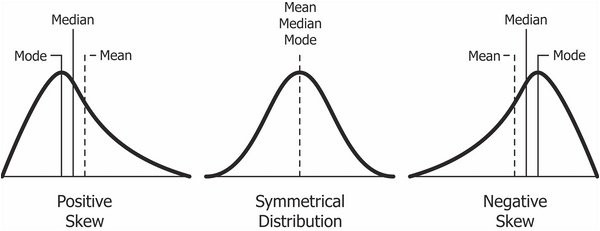


In [21]:
#Skewness of training set
df_train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

In [20]:
#Skewness of testing set
df_test.skew()

Weight_Kg         3.941111
Low_Price         4.585123
High_Price        4.326922
Sales_Total       3.839600
Total_Qty_Sold    3.710551
Total_Kg_Sold     4.270965
Stock_On_Hand     3.197405
dtype: float64


All the predictor variables are greater than 1, therefore we can clearly assume that the dataset has a high positive skew. 

In [23]:
df_train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

There is high kurtosis in the training dataset as all the predictor variables are greater than 3 indicating a large number of outliers.

## Univariate Analysis: Graphical 

We can look at the distribution of any numerical feature by using the following plots:

- histogram
- density plot
- box plot
- violin plot

For a categorical feature we will use a:

- bar plot


## Histogram and Density Plot¶

A histogram divides the variable into bins, counts the data points in each bin, and shows the bins on the x-axis and the counts on the y-axis.

A density plot is a smoothed, continuous version of a histogram estimated from the data.

For displaying a histogram and density plot we will be using the Matplotlib library and create a list of all numerical features to visualise these features at the same time.

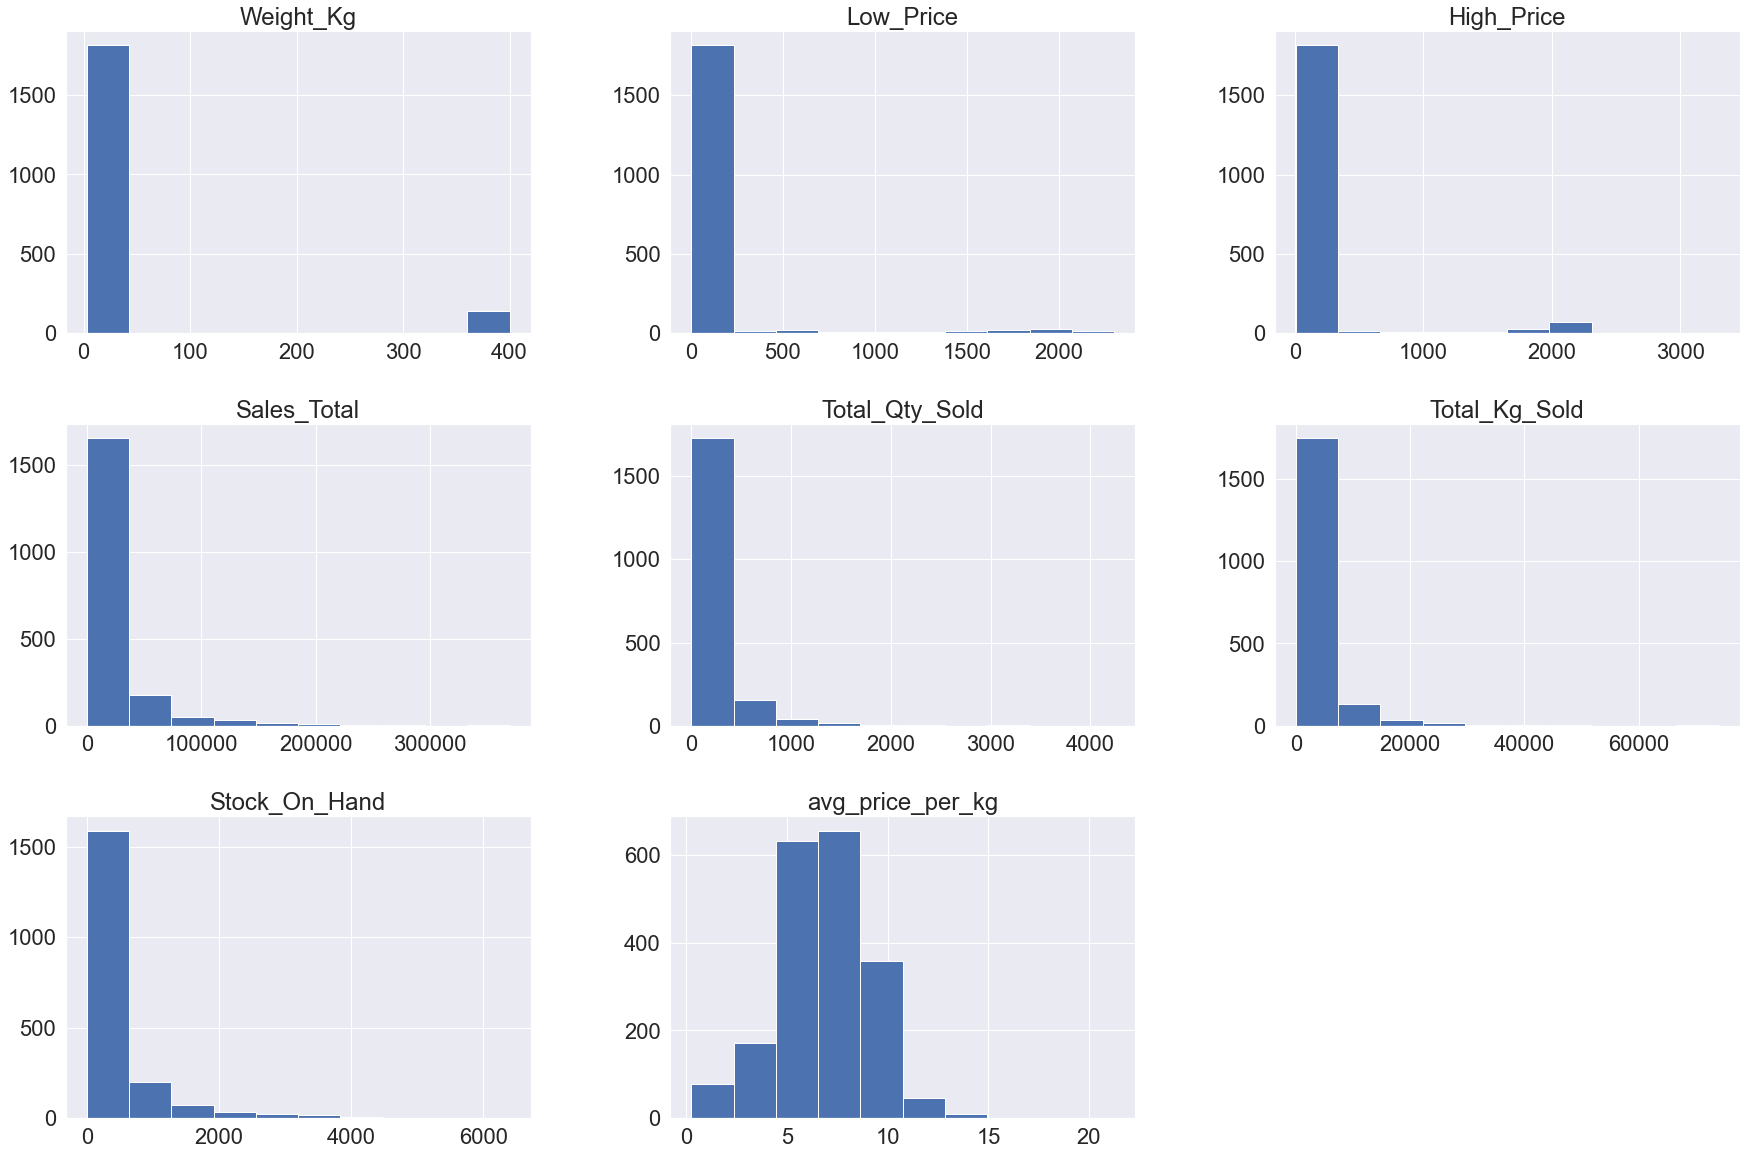

In [41]:
# histogram showing all numerical features

features = ['Weight_Kg',          
'Low_Price',           
'High_Price',          
'Sales_Total',         
'Total_Qty_Sold',      
'Total_Kg_Sold',       
'Stock_On_Hand',       
'avg_price_per_kg' ]
df_train[features].hist(figsize=(30,20));


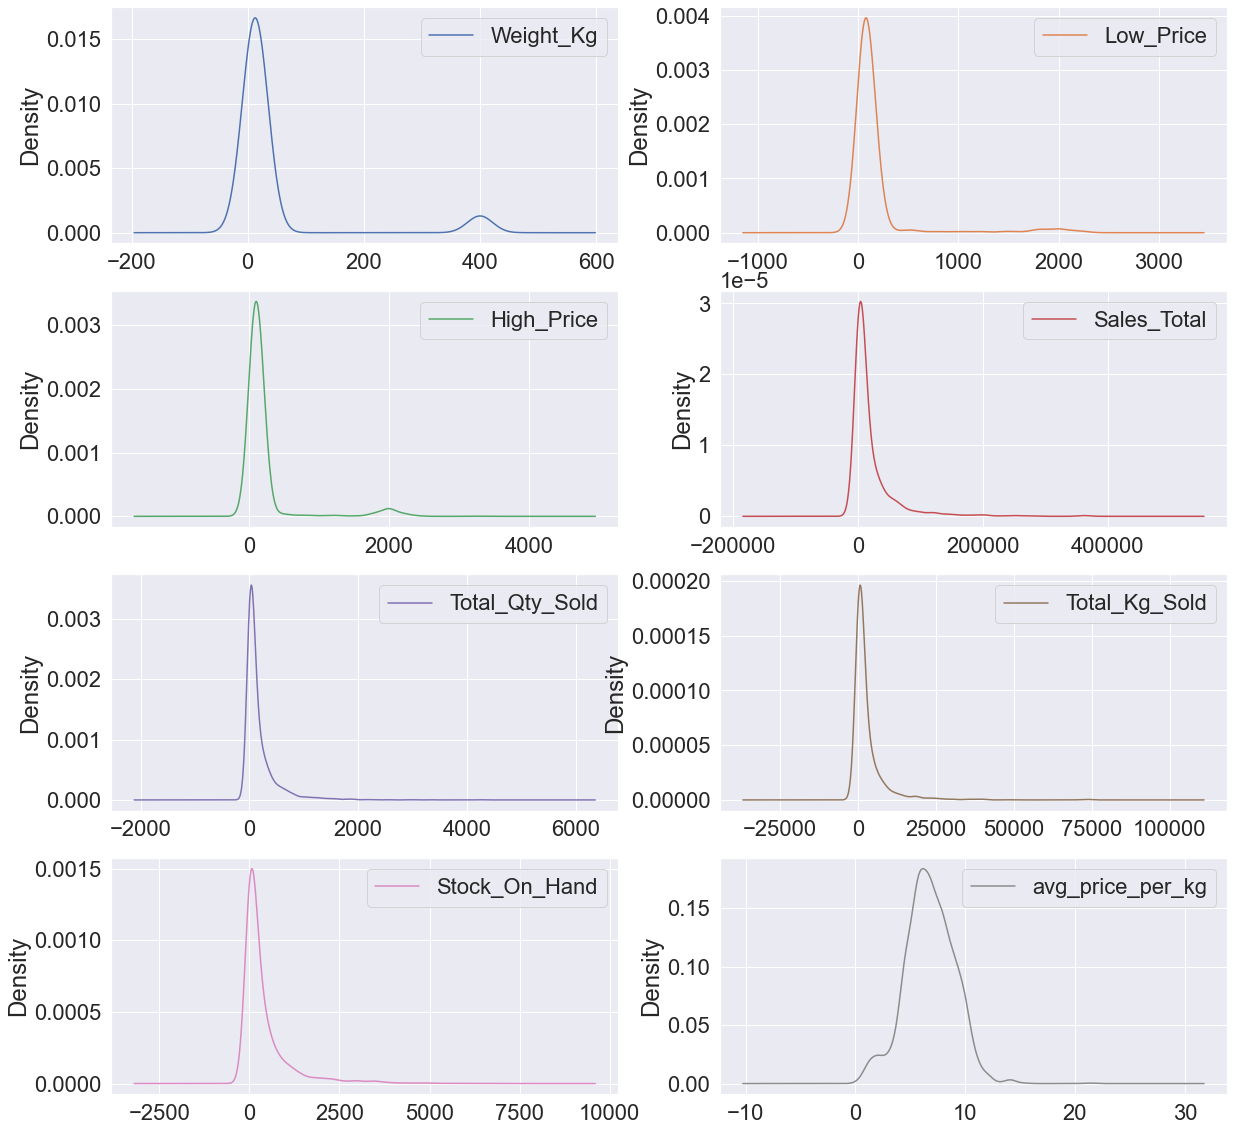

In [71]:
# density plot

features = ['Weight_Kg',          
'Low_Price',           
'High_Price',          
'Sales_Total',         
'Total_Qty_Sold',      
'Total_Kg_Sold',       
'Stock_On_Hand',       
'avg_price_per_kg' ]
df_train[features].plot(kind='density', subplots=True, layout=(4, 2), sharex=False, figsize=(20, 20));

We can clearly see that both the histogram and density plot display the same information. The density plot can be considered a smoothed version of the histogram and does not depend on the size of bins.

# Detecting outliers

Outliers are the data points that lie away from the usual distribution of the data and causes the below effects on the overall data distribution:

- Affects the overall standard variation of the data.
- Manipulates the overall mean of the data.
- Converts the data to a skewed form.
- It causes bias in the accuracy estimation of the machine learning model.
- Affects the distribution and statistics of the dataset.

Because of the above reasons, it is necessary to detect and get rid of outliers before modelling a dataset.

Outliers can be detected using the following visualization tools:
- box plots
- scatter plots

We will illustrate box plots below.

## Box Plot

A box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Outliers may be plotted as individual points. For the Box Plot, we will use the seaborn library and only select one feature instead of all the numerical features. We can visualise all numerical features simultaneously, but as the range of values for each feature is different, it will not create a useful visualisation. Standardisation or normalisation can be applied to a feature to adjust the range.

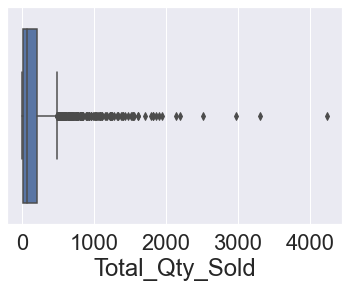

In [79]:
# boxplot showing total quantity sold
sns.boxplot(x='Total_Qty_Sold', data=df_train,);

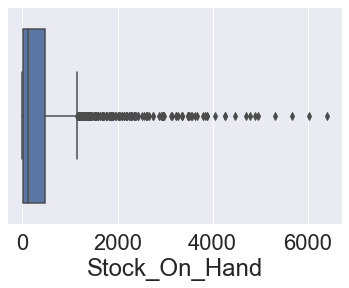

In [81]:
# boxplot showing stock on hand
sns.boxplot(x='Stock_On_Hand', data=df_train,);

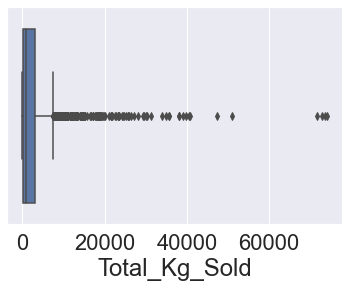

In [80]:
# boxplot showing total kg sold
sns.boxplot(x='Total_Kg_Sold', data=df_train,);

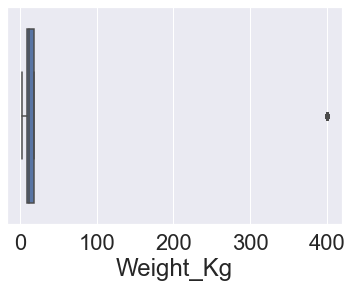

In [82]:
# boxplot showing weight
sns.boxplot(x='Weight_Kg', data=df_train,);

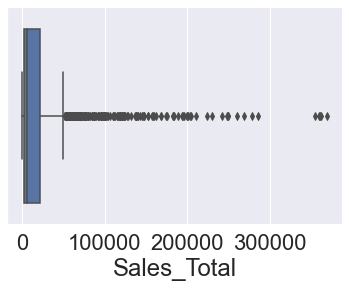

In [84]:
# boxplot showing sales total
sns.boxplot(x='Sales_Total', data=df_train,);

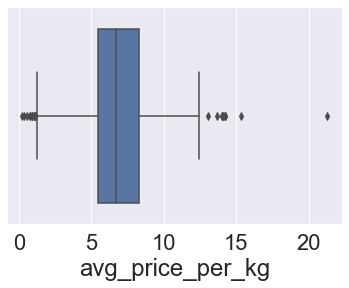

In [86]:
# boxplot showing avg price per kg
sns.boxplot(x='avg_price_per_kg', data=df_train,);

We have chosen to only display the box plot of each variable and not the violin plots, since both the box plot and violin plot display the distribution of the data. The boxplot ,however, provides certain statistics that are more useful.

The five vertical lines in the boxplot provide the information of the five number summary and the dots on the right hand side of the graph is a display of outliers. A five-number summary is especially useful in descriptive analyses or during the preliminary investigation of a large data set. 
A summary consists of five values: 
- the most extreme values in the data set (the maximum and minimum values) 
- the lower and upper quartiles 
- and the median. 
These values are presented together and ordered from lowest to highest: minimum value, lower quartile (Q1), median value (Q2), upper quartile (Q3), maximum value.

After examining the box plots, it is clear that the average price per kilogram of apples is fairly even distributed/symmetrical with a few outliers that are not included in the box of other observation i.e no where near the quartiles. The rest of the predictor variables are skewed to the left/distributed on the left hand side with outliers as well.

## Bar Plot

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

We have identified the following categorical features:
- Province
- Container
- Size grade

We will create a **bar plot** using the above categorical features to display the frequency distribution. 

We'll generate a bar plot of the categorical feature, where each bar represents a unique number from the data, and the height represents how many times that number occurred. This can be done by using seaborn's `countplot`. 

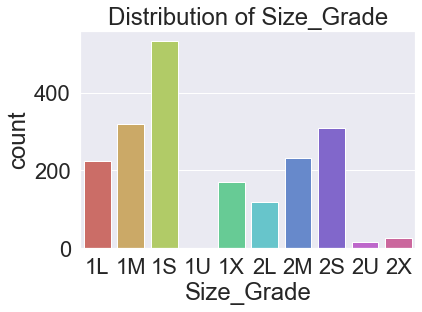

In [88]:
#bar plot of size grade
sns.countplot(x = 'Size_Grade', data = df_train, palette="hls")
plt.title("Distribution of Size_Grade");

1S is the largest/highest bar indicating that this size grade was the most popular size grade of apples.

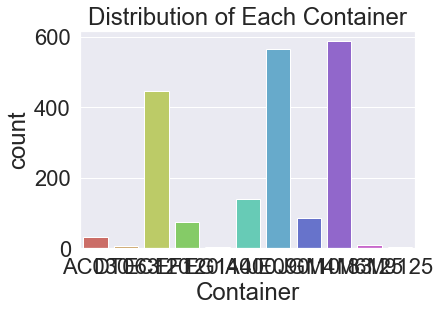

In [91]:
#bar plot of each container
sns.countplot(x = 'Container', data = df_train, palette="hls")
plt.title("Distribution of Each Container");

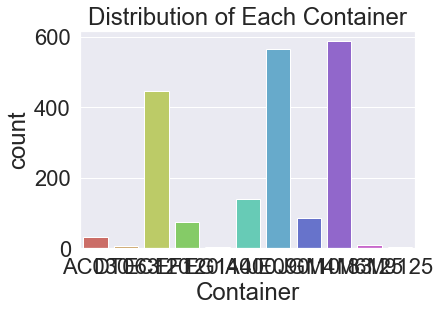

In [92]:
#bar plot of each container
sns.countplot(x = 'Container', data = df_train, palette="hls")
plt.title("Distribution of Each Container");

### Removing Outliers using Z-score function and IQR score method

Two main methods to remove outliers:
1. Z-score - signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
2. The interquartile range (IQR) - also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

There are clearly outliers present in all the variables from the visualization above. We will begin the process of removing the outliers below. When we remove outliers, we want to be careful that we are not disregarding measurements just because the value are far off. 

An extreme outlier can be defined:
* On the low end, an extreme outlier is below  $\text{First Quartile} -3 * \text{Interquartile Range}$
* On the high end, an extreme outlier is above $\text{Third Quartile} + 3 * \text{Interquartile Range}$


In [18]:
# before outlier removal

df_train.shape

(1952, 13)

In [19]:
#import libraries
from scipy import stats
import numpy as np

features = ['Weight_Kg',          
'Low_Price',           
'High_Price',          
'Sales_Total',         
'Total_Qty_Sold',      
'Total_Kg_Sold',       
'Stock_On_Hand',       
'avg_price_per_kg' ] 

#zscore function
z = np.abs(stats.zscore(df_train[features]))

#define threshold greater than 3 to identify outlier
threshold = 3

print(np.where(z < 3))

(array([   0,    0,    0, ..., 1951, 1951, 1951], dtype=int64), array([0, 1, 2, ..., 5, 6, 7], dtype=int64))


In [20]:
df_train_o = df_train_o[(z < 3).all(axis=1)]

print(df_train.shape - df_train.shape)

NameError: name 'df_train_o' is not defined

In [110]:
# Calculate first and third quartile
first_quartile = df_train['avg_price_per_kg'].describe()['25%']
third_quartile = df_train['avg_price_per_kg'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
df_train = df_train[(df_train['avg_price_per_kg'] > (first_quartile - 3 * iqr)) &
            (df_train['avg_price_per_kg'] < (third_quartile + 3 * iqr))]

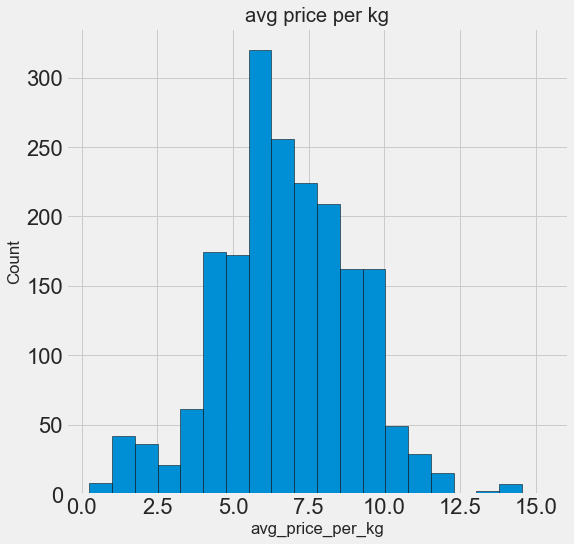

In [90]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(df_train['avg_price_per_kg'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('avg_price_per_kg'); 
plt.ylabel('Count'); plt.title('avg price per kg');

After removing the outliers, we can get back to the analysis.

This plot looks a little less suspicious and is close to normally distributed with a long tail on the right side (it has a positive skew).


# 3. Feature engineering and selection

## Dummy Variable Encoding

A dummy variable is a numerical variable used in regression analysis to represent subgroups of the sample in your study. Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. This means that we don’t need to write out separate equation models for each subgroup. The dummy variables act like ‘switches’ that turn various parameters on and off in an equation. Below is a function that takes a dataframe and returns dummy variables of its specified categorical features in our dataset.

In [162]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   category      
 1   Container         1952 non-null   category      
 2   Size_Grade        1952 non-null   category      
 3   Weight_Kg         1952 non-null   float64       
 4   Date              1952 non-null   datetime64[ns]
 5   Low_Price         1952 non-null   float64       
 6   High_Price        1952 non-null   float64       
 7   Sales_Total       1952 non-null   float64       
 8   Total_Qty_Sold    1952 non-null   int64         
 9   Total_Kg_Sold     1952 non-null   float64       
 10  Stock_On_Hand     1952 non-null   int64         
 11  avg_price_per_kg  1952 non-null   float64       
dtypes: category(3), datetime64[ns](1), float64(6), int64(2)
memory usage: 159.3 KB


In [163]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   category      
 1   Container         1952 non-null   category      
 2   Size_Grade        1952 non-null   category      
 3   Weight_Kg         1952 non-null   float64       
 4   Date              1952 non-null   datetime64[ns]
 5   Low_Price         1952 non-null   float64       
 6   High_Price        1952 non-null   float64       
 7   Sales_Total       1952 non-null   float64       
 8   Total_Qty_Sold    1952 non-null   int64         
 9   Total_Kg_Sold     1952 non-null   float64       
 10  Stock_On_Hand     1952 non-null   int64         
 11  avg_price_per_kg  1952 non-null   float64       
dtypes: category(3), datetime64[ns](1), float64(6), int64(2)
memory usage: 159.3 KB


In [161]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   category      
 1   Container         1952 non-null   category      
 2   Size_Grade        1952 non-null   category      
 3   Weight_Kg         1952 non-null   float64       
 4   Date              1952 non-null   datetime64[ns]
 5   Low_Price         1952 non-null   float64       
 6   High_Price        1952 non-null   float64       
 7   Sales_Total       1952 non-null   float64       
 8   Total_Qty_Sold    1952 non-null   int64         
 9   Total_Kg_Sold     1952 non-null   float64       
 10  Stock_On_Hand     1952 non-null   int64         
 11  avg_price_per_kg  1952 non-null   float64       
dtypes: category(3), datetime64[ns](1), float64(6), int64(2)
memory usage: 159.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19

Now the data is preprocessed and it's ready to be used in our two models i.e. Random Forest and XGBoost model

In [139]:
# dummy variable encoding
def dummy_encode_titles(input_df):
    temp_df = input_df.copy()
    
    # Apply Dummy Encoding 
    temp_df = pd.get_dummies(temp_df, columns=['Province','Container','Size_Grade'], drop_first=True)
    
    return temp_df

In [140]:
train_withDummy=dummy_encode_titles(train) #for train data
test_withDummy=dummy_encode_titles(test) #for test data

In [146]:
train_withDummy.drop('Commodities', axis=1, inplace=True)
test_withDummy.drop('Commodities', axis=1, inplace=True) 

In [154]:
train_withDummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Weight_Kg                      1952 non-null   float64
 1   Low_Price                      1952 non-null   float64
 2   High_Price                     1952 non-null   float64
 3   Sales_Total                    1952 non-null   float64
 4   Total_Qty_Sold                 1952 non-null   int64  
 5   Total_Kg_Sold                  1952 non-null   float64
 6   Stock_On_Hand                  1952 non-null   int64  
 7   avg_price_per_kg               1952 non-null   float64
 8   Province_EASTERN CAPE          1952 non-null   uint8  
 9   Province_NATAL                 1952 non-null   uint8  
 10  Province_ORANGE FREE STATE     1952 non-null   uint8  
 11  Province_TRANSVAAL             1952 non-null   uint8  
 12  Province_W.CAPE-BERGRIVER ETC  1952 non-null   

In [155]:
test_withDummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Weight_Kg                      1952 non-null   float64
 1   Low_Price                      1952 non-null   float64
 2   High_Price                     1952 non-null   float64
 3   Sales_Total                    1952 non-null   float64
 4   Total_Qty_Sold                 1952 non-null   int64  
 5   Total_Kg_Sold                  1952 non-null   float64
 6   Stock_On_Hand                  1952 non-null   int64  
 7   avg_price_per_kg               1952 non-null   float64
 8   Province_EASTERN CAPE          1952 non-null   uint8  
 9   Province_NATAL                 1952 non-null   uint8  
 10  Province_ORANGE FREE STATE     1952 non-null   uint8  
 11  Province_TRANSVAAL             1952 non-null   uint8  
 12  Province_W.CAPE-BERGRIVER ETC  1952 non-null   

## Correlations and Model Structure

Using the dummy variable dataframe, we can build a model that predicts Loan_Size (our dependent variable) as a function of 43 different independent variables (IVs)

In [ ]:
train_withDummy.corr()

In [ ]:
test_withDummy.corr()

### Correlation heatmap

In [ ]:
#train dataset
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(train_withDummy.corr(), xnames = train_withDummy.corr().columns, ax = ax);

In [ ]:
#test dataset
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(test_withDummy.corr(), xnames = test_withDummy.corr().columns, ax = ax);

We can see from the correlations that it's not be the best idea to keep all of the dummy variables.

If we use all of these variables, we're effectively working with superfluous or redundant information. Our model will also have collinearity issues:

Gender_Male and Gender_Female are perfectly negative correlated
This will likely be a problem when we build a model - let's check what an OLS model summary says.

## Fitting the model using statsmodels.OLS¶

### Generating the regression string

We will be importing the statsmodels library which has a rich set of statistical tools to help us. Those of you familiar with the R language will know that fitting a machine learning model requires a sort of string of the form:

y ~ X

which is read as follows: "Regress y on X". statsmodels works in a similar way, so we need to generate an appropriate string to feed to the method when we wish to fit the model.

In [ ]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = df_dummies.copy()

# The dependent variable:
y_name = 'Loan_Size'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

In [ ]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True)

# Again make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ", "_") for col in df_dummies.columns]

# Reorder columns with the dependent variable (claim_amount) the last column
column_titles = [col for col in df_dummies.columns if col !=
                 'Loan_Size'] + ['Loan_Size']
df_dummies = df_dummies.reindex(columns=column_titles)

df_dummies.head()

In [ ]:
df_dummies.shape

We now have 41 columns instead of 44. This gives us 40 potential independent variables that could be used to build a relationship on Loan_Size

### Let's check what the OLS model summary would say if we now fit only the 41 variable columns

In [ ]:
# We'll keep the model DataFrame, but only specify the columns we want to fit this time
X_names = [col for col in df_dummies.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+' ~ '+'+'.join(X_names)

# Fit the model using the model dataframe
model = ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
We see that the condition number has improved, but there is still mention of strong multicollinearity in warning [2]

We also see that the Q1 - Q3 range of coefficients and expected errors are larger than the absolute size of the coefficients themselves...

Let's make further selections on the variables now using their significance.

## Variable Selection by Correlation and Significance

We now have 40 predictor variables to choose from, so we need a way of guiding us to choose the best ones to be our predictors. One way is to look at the correlations between the Loan Size and each variables in our DataFrame and select those with the strongest correlations (both positive and negative).

We also need to consider how significant those features are.

The code below will create a new DataFrame and store the correlation coefficents and p-values in that DataFrame for reference.

In [ ]:
# Calculate correlations between predictor variables and the response variable
corrs = df_dummies.corr()['Loan_Size'].sort_values(ascending=False)

In [ ]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Loan_Size']
for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['Loan_Size'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]


Now, we've got a sorted list of the p-values and correlation coefficients for each of the features, when considered on their own.

If we were to use a logic test with a significance value of 5% (p-value < 0.05), we could infer that the following features are statistically significant:

Income
Mortgage
CCAvg
Experience
Age
Education_Undergrad
Family
Let's keep only the variables that have a significant correlation with the dependent variable. We'll put them into an independent variable DataFrame X

In [ ]:
# The dependent variable remains the same:
y_data = df_dummies[y_name]  # y_name = 'Loan_Size'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_dummies[X_names]

In [ ]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

In [ ]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

In [ ]:
# Lets take a new subset of our potential independent variables
X_remove = ['Age']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

In [ ]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

## Variable Selection by Variance Thresholds¶

Variance Thresholds remove features whose values don't change much from observation to observation. The objective here is to remove all features that have a variance lower than the selected threshold.

For example, suppose that in our loans dataset 97% of observations were for 40-year-old women, then the Age and Gender features can be removed without a great loss in information.

It is important to note that variance is dependent on scale, so the features will have to be normalized before implementing variance thresholding.

In [ ]:
# Separate data into independent (X) and independent (y) variables
X_names = list(df_dummies.columns)
X_names.remove(y_name)
X_data = df_dummies[X_names]
y_data = df_dummies[y_name]

In [ ]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

In [ ]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

In [ ]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

In [ ]:
X_new.shape

In [ ]:
# Create Variance Threshold objects
selector_1 = VarianceThreshold(threshold=0.05)
selector_2 = VarianceThreshold(threshold=0.1)
selector_3 = VarianceThreshold(threshold=0.15)

In [ ]:
selector_1.fit(X_normalize)

In [ ]:
selector_2.fit(X_normalize)

In [ ]:
selector_3.fit(X_normalize)

In [ ]:
# Select subset of columns
X_1 = X_normalize[X_normalize.columns[selector_1.get_support(indices=True)]]
X_2 = X_normalize[X_normalize.columns[selector_2.get_support(indices=True)]]
X_3 = X_normalize[X_normalize.columns[selector_3.get_support(indices=True)]]

In [ ]:
# Create figure and axes
f, ax = plt.subplots(figsize=(8, 3), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [X_1.shape[1], X_2.shape[1], X_3.shape[1]]
thresholds = ['0.05', '0.1', '0.15']

# Plot graph
ax.set_title('# of Predictors vs Thresholds')
ax.set_ylabel('# of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

# 4. Establish a baseline and compare several machine learning models on a performance metric

## Training Random Forest Model

In [156]:
X = train_withDummy.drop('avg_price_per_kg',axis=1).values
#X = train_withDummy.drop(['avg_price_per_kg','Sales_Total'],axis=1).values  #df.drop(['B', 'C'], axis=1)
y = train_withDummy['avg_price_per_kg'].values

In [157]:
# Train test split
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [158]:
# Our forest consists of 100 trees with a max depth of 10
model_RF = RandomForestRegressor(n_estimators=100, max_depth=10, random_state = 42)
# Train the model on training data
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=42)

## Saving Random Forest model

In [159]:
import pickle

model_save_path = "RF_model.pkl"

with open(model_save_path,'wb') as file:
    pickle.dump(model_RF,file)

## Training Xgboost Model

In [ ]:
X = train.drop('avg_price_per_kg',axis=1).values  #df.drop(['B', 'C'], axis=1)
y = train['avg_price_per_kg']

In [ ]:
# Train test split
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=6)

In [ ]:
# create an xgboost regression model
model_XGB = xgb.XGBRegressor()

In [ ]:
# Train the model on training data
model_XGB.fit(x_train, y_train)

## Saving Xgboost Model

In [ ]:
import pickle

model_save_path = "XG_model.pkl"

with open(model_save_path,'wb') as file:
    pickle.dump(model_XGB,file)

# 5. Perform hyperparameter tuning on the best model to optimize it for the problem

## Test Random Forest Model

Testing and getting predictions

In [ ]:
# Get predictions
y_pred = model_RF.predict(np.array(test_withDummy)) #NOTE that we have to convert the 'test_withDummy' dataframe to an array

In [ ]:
y_pred

## Test Xgboost Model

In [ ]:
#Get predictions
y_pred2 = model_XGB.predict(np.array(test))

In [ ]:
y_pred2

## Submission

In [ ]:
# create submission dataframe - Random Forest Model

submission = pd.DataFrame(
    {
     'avg_price_per_kg': y_pred
    })
submission.index += 1 # start index from 1
submission["Index"] = submission.index #name the index column 'Index'
submission= submission[['Index', 'avg_price_per_kg']] 

In [ ]:
submission

In [ ]:
# save DataFrame to csv file for submission (Give it any name you want)
submission.to_csv("ZM2_RF_model.csv", index=False)

In [ ]:
# create submission dataframe - XGBoost Model

submission = pd.DataFrame(
    {
     'avg_price_per_kg': y_pred2
    })
submission.index += 1
submission["Index"] = submission.index
submission= submission[['Index', 'avg_price_per_kg']]

In [ ]:
submission

In [ ]:
# save DataFrame to csv file for submission
submission.to_csv("ZM2_xgboost_model.csv", index=False)

# 6. Evaluate the best model on the testing set

In [ ]:
# Random Forest Model

test_pred1 = model_RF.predict(x_test)
    
test_rmse = np.sqrt(mean_squared_error(test_pred1,y_test))

{'Test RMSE': test_rmse}

In [ ]:
# XGBoost Model

test_pred2 = model_XGB.predict(x_test)
    
test_rmse = np.sqrt(mean_squared_error(test_pred2,y_test))

{'Test RMSE': test_rmse}

# 7. Interpret the model results to the extent possible

As we can see the XGBoost model has lower RMSE than the Random Forest model

# 8. Draw conclusions

# THE END